In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 


In [57]:
uber = pd.read_csv("/content/drive/My Drive/Uber Request Data.csv")

In [58]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [59]:
un_rides = uber.loc[uber['Status'] != 'Trip Completed']


In [60]:
uncom_rid = un_rides.shape[0]

In [61]:
rides = uber.loc[uber['Status'] == 'Trip Completed']

In [62]:
com_rid = rides.shape[0]

# plot of completed rides or uncompleted rides ( Here uncompleted rides due to 2 reasons)
1. Because of Cancelation . 
2. Second is due to unavailability . 
3. lets deep dive in it . 



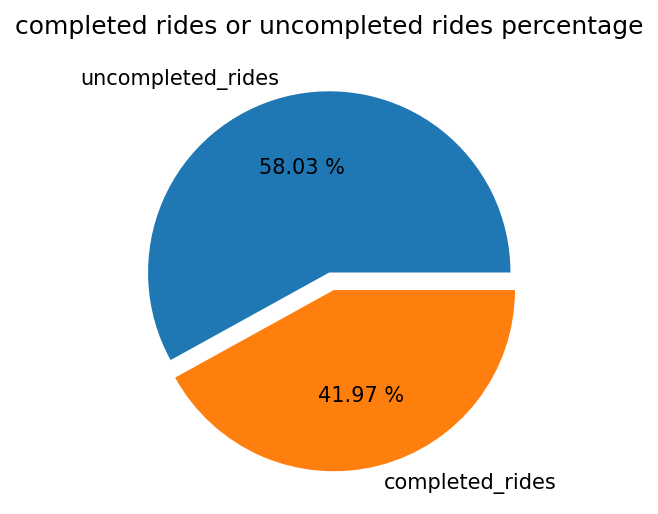

In [63]:
plt.figure(figsize=(6,4),dpi=150)
my_explode = (0, 0.1)
labels = ['uncompleted_rides','completed_rides']
x = [uncom_rid,com_rid]
plt.title("completed rides or uncompleted rides percentage")
plt.pie(x,labels=labels,explode = my_explode,autopct='%.2f %%')
plt.show()


Here we are look into . 

1) Total completed trips 
2) Total canceled trips 
3) Total no car available 
4) Total Completed when booked from city  
5) Total canceled when booked from city 
6) Total NO car available when booked from City 
7) Total Completed trips when booked from Aiport 
8) Total Canceled Trips when booked from Aiport
9) Total No Cars Available when booked from Airport 


In [65]:
uber.info

<bound method DataFrame.info of       Request id Pickup point  ...    Request timestamp       Drop timestamp
0            619      Airport  ...      11/7/2016 11:51      11/7/2016 13:00
1            867      Airport  ...      11/7/2016 17:57      11/7/2016 18:47
2           1807         City  ...       12/7/2016 9:17       12/7/2016 9:58
3           2532      Airport  ...      12/7/2016 21:08      12/7/2016 22:03
4           3112         City  ...  13-07-2016 08:33:16  13-07-2016 09:25:47
...          ...          ...  ...                  ...                  ...
6740        6745         City  ...  15-07-2016 23:49:03                  NaN
6741        6752      Airport  ...  15-07-2016 23:50:05                  NaN
6742        6751         City  ...  15-07-2016 23:52:06                  NaN
6743        6754         City  ...  15-07-2016 23:54:39                  NaN
6744        6753      Airport  ...  15-07-2016 23:55:03                  NaN

[6745 rows x 6 columns]>

In [66]:
uber.describe

<bound method NDFrame.describe of       Request id Pickup point  ...    Request timestamp       Drop timestamp
0            619      Airport  ...      11/7/2016 11:51      11/7/2016 13:00
1            867      Airport  ...      11/7/2016 17:57      11/7/2016 18:47
2           1807         City  ...       12/7/2016 9:17       12/7/2016 9:58
3           2532      Airport  ...      12/7/2016 21:08      12/7/2016 22:03
4           3112         City  ...  13-07-2016 08:33:16  13-07-2016 09:25:47
...          ...          ...  ...                  ...                  ...
6740        6745         City  ...  15-07-2016 23:49:03                  NaN
6741        6752      Airport  ...  15-07-2016 23:50:05                  NaN
6742        6751         City  ...  15-07-2016 23:52:06                  NaN
6743        6754         City  ...  15-07-2016 23:54:39                  NaN
6744        6753      Airport  ...  15-07-2016 23:55:03                  NaN

[6745 rows x 6 columns]>

In [67]:
uber['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [68]:
total_cancel = uber.loc[uber['Status'] == 'Cancelled'].shape[0] 

In [69]:
cancel_city = uber.loc[(uber['Status'] == 'Cancelled') & (uber['Pickup point'] == 'City')].shape[0] 

In [70]:
cancel_airport = uber.loc[(uber['Status'] == 'Cancelled') & (uber['Pickup point'] == 'Airport')].shape[0] 

In [71]:
total_no_car_available = uber.loc[uber['Status'] == 'No Cars Available'].shape[0] 

In [72]:
no_cars_airport = uber.loc[(uber['Status'] == 'No Cars Available') & (uber['Pickup point'] == 'Airport')].shape[0]   

In [73]:
no_cars_city = uber.loc[(uber['Status'] == 'No Cars Available') & (uber['Pickup point'] == 'City')].shape[0] 

In [74]:
rides.shape[0]

2831

In [75]:
total_completed = uber.loc[(uber['Status'] == 'Trip Completed')].shape[0]

In [76]:
completed_city = uber.loc[(uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'City')].shape[0]

In [77]:
completed_airport = uber.loc[(uber['Status'] == 'Trip Completed') & (uber['Pickup point'] == 'Airport')].shape[0]

In [78]:
y = [total_completed, total_cancel, total_no_car_available , completed_city, cancel_city, no_cars_city , completed_airport, cancel_airport, no_cars_airport]

In [79]:
x = ['total_completed', 'total_cancel', 'total_no_car_available' , 'completed_city', 'cancel_city', 'no_cars_available_city' , 'completed_airport', 'cancel_airport', 'no_cars_available_airport']

# VISUALIZATION 

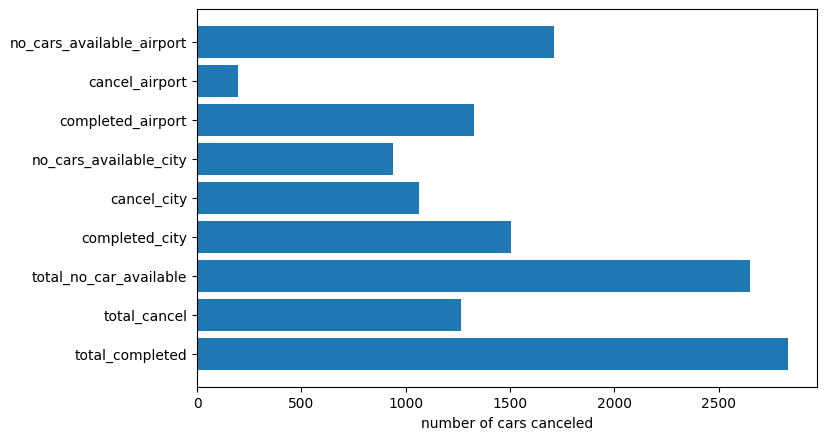

In [80]:
plt.figure(figsize=(8,5), dpi=100)
plt.barh(x,y)
plt.xlabel("number of cars canceled")
plt.show()


# Here is the Basic analysis of Total demands of cars 
1) Total Demand of Cars 

2) Supply that delivered successfully 

3) Overall shortage comprises of 2 things (a. - Due to cancelation , b. Due to no car available.) 

4) Availability of car comrises of both (a. Those successfully delivered b. those available but canceled) 

5) Shortage due to cancelation 


In [81]:
total_demand =  total_completed + total_cancel +  total_no_car_available 

In [82]:
total_demand 

6745

In [83]:
available_cars = total_completed + total_cancel 

In [84]:
total_cancel

1264

In [85]:
total_no_car_available

2650

In [86]:
shortage_due_to_cancellation = total_demand  -  (total_no_car_available+total_completed) 

In [87]:
overall_shortage = total_demand - total_completed  

In [88]:
supplied_succesfully = total_completed

In [89]:
x_axis = [total_demand,supplied_succesfully, overall_shortage ,available_cars, shortage_due_to_cancellation]

In [90]:
x_axis

[6745, 2831, 3914, 4095, 1264]

In [91]:
labels = ['total_demand','supplied_succesfully','overall_shortage' ,'available_cars', 'shortage_due_to_cancellation']

# VISUALIZATION 

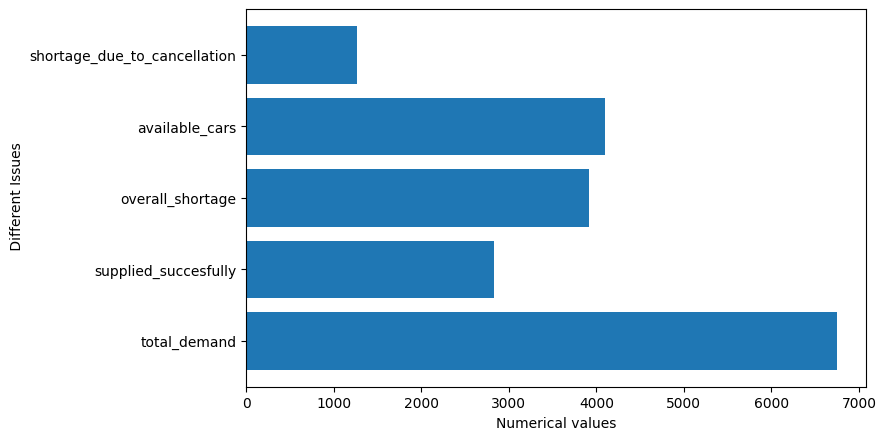

In [92]:
plt.figure(figsize=(8,5), dpi=100)
plt.barh(labels, x_axis)
plt.xlabel("Numerical values")
plt.ylabel(" Different Issues")
plt.show()

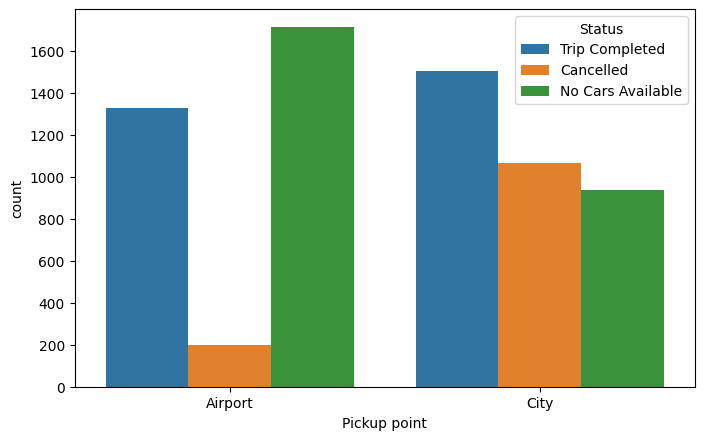

In [93]:
plt.figure(figsize=(8,5), dpi=100)
sns.countplot(x=uber['Pickup point'],hue =uber['Status'] ,data = uber) 
plt.show()

In [94]:
total_completed

2831

In [95]:
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [96]:
uber.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [97]:
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [117]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])

In [118]:
uber['req_hour'] = uber['Request timestamp'].dt.hour                                                                                          

In [119]:
uber['req_hour']

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req_hour, Length: 6745, dtype: int64

In [120]:
uber['drop_hour'] = uber['Drop timestamp'].str.slice(-5, -3)

In [121]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,drop_hour,Request_time_slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,13,Late_Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,18,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,9,Late_Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,22,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,25,Morning


In [103]:
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req_hour', 'drop_hour'],
      dtype='object')

In [104]:
uber.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
req_hour                      int64
drop_hour                    object
dtype: object

In [105]:
uber['req_hour'] = uber['req_hour'].astype(int).head()

In [106]:
uber['drop_hour'].dtype

dtype('O')

In [107]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,drop_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11.0,13
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17.0,18
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9.0,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21.0,22
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8.0,25


#Time Slots Division 

In [125]:
uber['Request_time_slots'] = 'Late_night'
uber.loc[uber['req_hour'].between(5,8, inclusive=True),'Request_time_slots'] = 'Morning'
uber.loc[uber['req_hour'].between(9,12, inclusive=True),'Request_time_slots'] = 'Late_Morning'
uber.loc[uber['req_hour'].between(13,16, inclusive=True),'Request_time_slots'] = 'Noon'
uber.loc[uber['req_hour'].between(17,21, inclusive=True),'Request_time_slots'] = 'Evening'
uber.loc[uber['req_hour'].between(21,24, inclusive=True),'Request_time_slots'] = 'Night'  


In [126]:
uber.head(5) 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,drop_hour,Request_time_slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,13,Late_Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,18,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,9,Late_Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,22,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,25,Morning


In [127]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,drop_hour,Request_time_slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,11,13,Late_Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,17,18,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,9,9,Late_Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,21,22,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,25,Morning
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN,23,NaN,Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN,23,NaN,Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN,23,NaN,Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN,23,NaN,Night


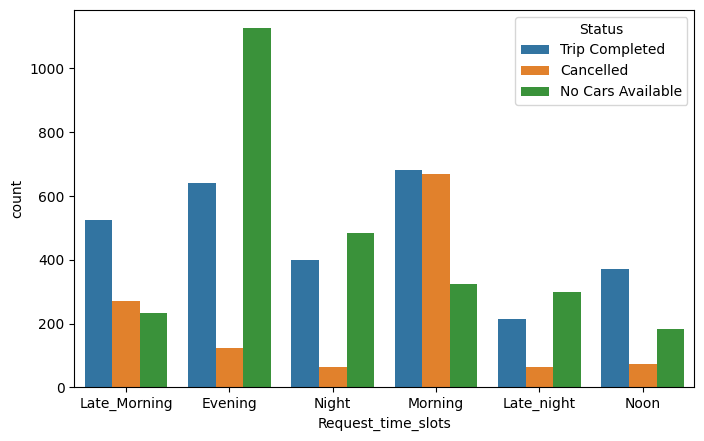

In [128]:
plt.figure(figsize=(8,5),dpi=100)
sns.countplot(x=uber['Request_time_slots'],hue =uber['Status'] ,data = uber) 
plt.show()

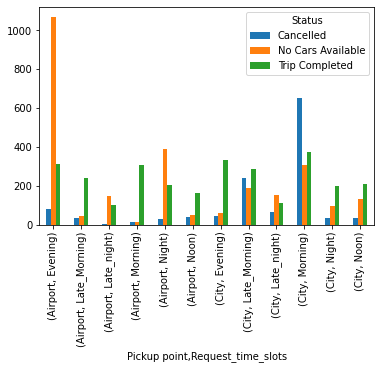

In [140]:
pickup_func = pd.DataFrame(uber.groupby(['Pickup point','Request_time_slots', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_func.plot.bar() 
plt.show()


In [141]:
pickup_func

Status                           Cancelled  No Cars Available  Trip Completed
Pickup point Request_time_slots                                              
Airport      Evening                    78               1067             312
             Late_Morning               32                 44             239
             Late_night                  2                148             103
             Morning                    15                 14             308
             Night                      31                390             203
             Noon                       40                 50             162
City         Evening                    46                 60             330
             Late_Morning              239                189             286
             Late_night                 63                151             111
             Morning                   653                309             373
             Night                      33                 94             196
             Noon                       32                134             208

In [142]:
uber['Demand'] = 1 

In [132]:
uber['Supply'] = 0
uber.loc[(uber['Status'] == 'Trip Completed'),'Supply'] = 1

In [133]:
uber['Gap'] = uber['Demand'] - uber['Supply']
uber.loc[uber['Gap']==0,'Gap'] = 'Trip Completed'
uber.loc[uber['Gap']==1,'Gap'] = 'Trip Not Completed' 

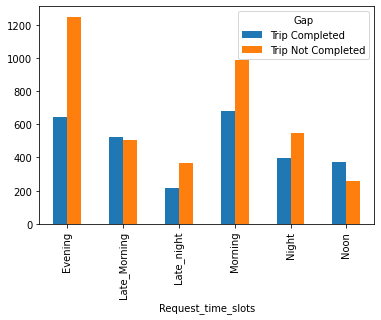

In [148]:

timeslot_gap_func = pd.DataFrame(uber.groupby(['Request_time_slots','Gap'])['Request id'].count().unstack(fill_value=0))
timeslot_gap_func.plot.bar()
plt.show() 

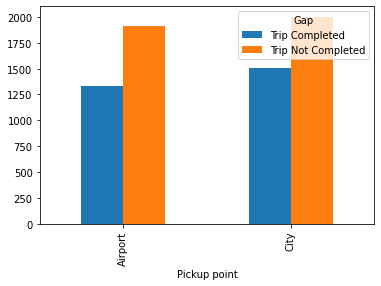

In [149]:
pickup_gap_func = pd.DataFrame(uber.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
pickup_gap_func.plot.bar()
plt.show()

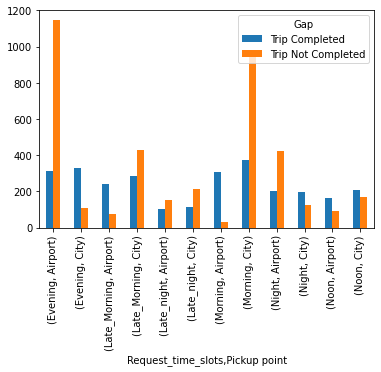

In [151]:
main_gap_func = pd.DataFrame(uber.groupby(['Request_time_slots','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
main_gap_func.plot.bar()
plt.show() 

# What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).

Two Times are the most Problematic .
1) when pickup point - City .
2) When pickup point - Airport . 

1) 
ACCORDING to my analysis , cancellation is occur mostly in morning time in the office hours and this is due to the reason of High Rush , When there is Rush the drivers have options to do more rides in less time rather then to travel more and waste time and do less rides . 
2) 
In the evening time the problem is  no availability of cars when the pickup point is AIRPORT , and I think it is more serious issue because it can easily solved and more Revenue generating issue . 

# Recommend some ways to resolve the supply-demand gap.

#ACCORDING TO MY ANALYSIS , MY SOLUTIONS ARE ******* 

#For Early morning/Morning - cancellation issue 
1) We should provide some Incentives to the Drivers for AIRPORT RIDES/WAITING . 
2) We should Make some policies for Our Drivers so that they make more money for the time they wait in morning traffic by decreasing our commission . 
3) If Drivers Cancel their Rides multiple times then we should give Penalty to Drivers 

# For "NO CAR AVAILABLE " issue at Airport in EVENING/Night .
1) We should provide high Incentives specially for night times and for AIRPORT Rides and extra weightage to the rides . 
2) We should make extra Stands for AIRPORTS .
3) We should provide Extra Cars at low cost EMI to drivers , so that as much as Drivers can connect to us , And we can make profits in Long term . 

